In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pathlib

## Loading data

In [34]:
directory_path = '../../04_-_Dev/videos'
features = 'eGeMAPS'

In [28]:
#currentDirectory = pathlib.Path(directory_path)
#currentPattern = "*." + features + ".annotated.csv"
#file_list = [str(currentFile) for currentFile in currentDirectory.glob(currentPattern)]
#file_list

In [29]:
#df_total = pd.DataFrame()
#for filename in file_list:
#    df = pd.read_csv(filename, delimiter=';')
#    df_total = pd.concat([df_total, df], axis=0)


In [30]:
#print('Number of videos', df_total['video_name'].nunique())
#print('Number of annotations', df_total[['video_name','diapo']].drop_duplicates().shape[0])

In [31]:
#df_total.to_pickle(directory_path + '/audio_' + features + '_data.p')

In [5]:
#df_total.loc[df_total.isna().any(axis=1),'frameTime'].value_counts()

Series([], Name: frameTime, dtype: int64)

In [35]:
#df_total = df_total.dropna(axis=0)

In [8]:
df_total = pd.read_pickle(directory_path + '/audio_' + features + '_data.p')

In [4]:
df_total.shape

(2573581, 77)

In [6]:
time_window = 5
df_total['frameTimeWindow'] = df_total.frameTime.apply(lambda x : np.floor(x / time_window) * time_window).astype(int)

In [7]:
df_total.frameTimeWindow.value_counts().sort_index()

0       14940
5       15000
10      15000
15      15000
20      15000
        ...  
1100      500
1105      500
1110      500
1115      500
1120      359
Name: frameTimeWindow, Length: 225, dtype: int64

## Data exploration

In [10]:
df_total.groupby('diapo').agg({'frameTime':'mean'})


,frameTime
diapo,
1,99.359963
8,195.661667
9,270.161667
10,353.161667
11,434.661667
12,568.660055
17,659.128333
18,784.525699


In [11]:
df_stats_stress_global = df_total[['video_name','stress_global']].drop_duplicates()['stress_global'].value_counts().sort_index()
df_stats_stress_global


0.0    12
1.0    10
2.0     8
Name: stress_global, dtype: int64

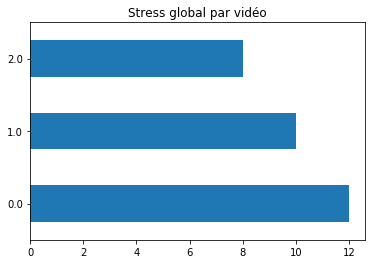

In [12]:
df_stats_stress_global.plot(kind='barh', title='Stress global par vidéo');


In [13]:
df_stats_stress = df_total[['video_name','diapo','stress']].drop_duplicates()['stress'].value_counts().sort_index()
df_stats_stress

0.0    101
1.0    113
2.0     25
3.0      1
Name: stress, dtype: int64

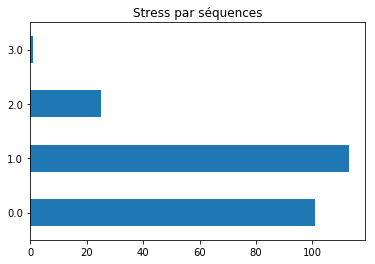

In [14]:
df_stats_stress.plot(kind='barh', title='Stress par séquences');

In [15]:
df_stats_stress_diapo = df_total[['video_name','diapo','stress']].drop_duplicates()[['diapo','stress']].groupby(['diapo','stress']).agg({'stress':'count'}).sort_index().unstack(fill_value=0)
df_stats_stress_diapo

stress            
stress    0.0 1.0 2.0 3.0
diapo                    
1          17  11   2   0
8          16  10   4   0
9          11  15   4   0
10         12  15   3   0
11         13  13   3   1
12          9  18   3   0
17         16  13   1   0
18          7  18   5   0

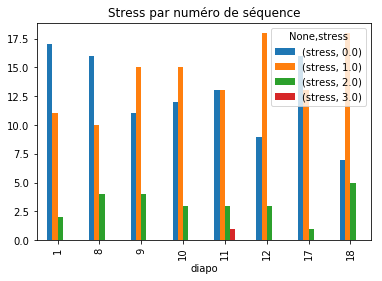

In [16]:
df_stats_stress_diapo.plot(kind='bar', title='Stress par numéro de séquence');

## Data pre-processing 1 - Sans utilisation de la temporalité

In [17]:
from scipy.stats import kurtosis, skew

def percentil25(x): 
    return np.percentile(x, q=25)

def percentil75(x): 
    return np.percentile(x, q=75)

In [9]:
# Sequence as a whole
#X = df_total.iloc[:,2:].groupby(['video_name','diapo']).agg({'mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew}).iloc[:,:-18]

In [21]:
# 5 seconds windows
X = df_total.iloc[:,2:].groupby(['video_name','diapo','frameTimeWindow']).agg({'mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew}).iloc[:,:-18]

In [22]:
X.columns

MultiIndex([(                   'Loudness_sma3',        'mean'),
            (                   'Loudness_sma3',      'median'),
            (                   'Loudness_sma3',         'std'),
            (                   'Loudness_sma3', 'percentil25'),
            (                   'Loudness_sma3', 'percentil75'),
            (                   'Loudness_sma3',        'skew'),
            (                   'Loudness_sma3',         'max'),
            (                   'Loudness_sma3',         'min'),
            (                   'Loudness_sma3',    'kurtosis'),
            (                 'alphaRatio_sma3',        'mean'),
            ...
            (   'F3amplitudeLogRelF0_sma3nz_de',    'kurtosis'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',        'mean'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',      'median'),
            ('F3amplitudeLogRelF0_sma3nz_de_de',         'std'),
            ('F3amplitudeLogRelF0_sma3nz_de_de', 'percentil25'),
         

In [23]:
X

Loudness_sma3            \
                                                         mean    median   
video_name                diapo frameTimeWindow                           
Test_pour_AFPA            1     0                    0.114774  0.114900   
                                5                    0.115736  0.115328   
                                10                   0.113579  0.113245   
                                15                   0.118081  0.117924   
                                20                   0.118637  0.119101   
...                                                       ...       ...   
WIN_20210417_14_53_12_Pro 18    600                  0.032633  0.017399   
                                605                  0.024742  0.024232   
                                610                  0.025769  0.025452   
                                615                  0.045493  0.047412   
                                620                  0.051241  0.051371   

                                                                       \
                                                      std percentil25   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                0.002580    0.112972   
                                5                0.002815    0.113882   
                                10               0.003511    0.111469   
                                15               0.002994    0.116204   
                                20               0.003337    0.116397   
...                                                   ...         ...   
WIN_20210417_14_53_12_Pro 18    600              0.036212    0.001687   
                                605              0.018413    0.008823   
                                610              0.020800    0.006183   
                                615              0.012051    0.038895   
                                620              0.006276    0.048707   

                                                                       \
                                                percentil75      skew   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                  0.116547  0.012275   
                                5                  0.117393  0.713457   
                                10                 0.115056  0.917789   
                                15                 0.119927  0.307721   
                                20                 0.121091 -0.395910   
...                                                     ...       ...   
WIN_20210417_14_53_12_Pro 18    600                0.051879  1.222678   
                                605                0.037869  0.391991   
                                610                0.040993  0.554724   
                                615                0.052893 -0.616833   
                                620                0.054039 -0.340928   

                                                                               \
                                                      max       min  kurtosis   
video_name                diapo frameTimeWindow                                 
Test_pour_AFPA            1     0                0.123974  0.108240  0.022023   
                                5                0.127661  0.109675  1.101698   
                                10               0.125830  0.105259  1.637765   
                                15               0.128375  0.110818  0.320136   
                                20               0.126731  0.108863 -0.354434   
...                                                   ...       ...       ...   
WIN_20210417_14_53_12_Pro 18    600              0.183413  0.001034  0.763651   
                                605              0.078965  0.001034 -0.688585   
                                610              0.094043  0

In [24]:
X.sort_index()

Loudness_sma3            \
                                                         mean    median   
video_name                diapo frameTimeWindow                           
Test_pour_AFPA            1     0                    0.114774  0.114900   
                                5                    0.115736  0.115328   
                                10                   0.113579  0.113245   
                                15                   0.118081  0.117924   
                                20                   0.118637  0.119101   
...                                                       ...       ...   
WIN_20210417_14_53_12_Pro 18    600                  0.032633  0.017399   
                                605                  0.024742  0.024232   
                                610                  0.025769  0.025452   
                                615                  0.045493  0.047412   
                                620                  0.051241  0.051371   

                                                                       \
                                                      std percentil25   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                0.002580    0.112972   
                                5                0.002815    0.113882   
                                10               0.003511    0.111469   
                                15               0.002994    0.116204   
                                20               0.003337    0.116397   
...                                                   ...         ...   
WIN_20210417_14_53_12_Pro 18    600              0.036212    0.001687   
                                605              0.018413    0.008823   
                                610              0.020800    0.006183   
                                615              0.012051    0.038895   
                                620              0.006276    0.048707   

                                                                       \
                                                percentil75      skew   
video_name                diapo frameTimeWindow                         
Test_pour_AFPA            1     0                  0.116547  0.012275   
                                5                  0.117393  0.713457   
                                10                 0.115056  0.917789   
                                15                 0.119927  0.307721   
                                20                 0.121091 -0.395910   
...                                                     ...       ...   
WIN_20210417_14_53_12_Pro 18    600                0.051879  1.222678   
                                605                0.037869  0.391991   
                                610                0.040993  0.554724   
                                615                0.052893 -0.616833   
                                620                0.054039 -0.340928   

                                                                               \
                                                      max       min  kurtosis   
video_name                diapo frameTimeWindow                                 
Test_pour_AFPA            1     0                0.123974  0.108240  0.022023   
                                5                0.127661  0.109675  1.101698   
                                10               0.125830  0.105259  1.637765   
                                15               0.128375  0.110818  0.320136   
                                20               0.126731  0.108863 -0.354434   
...                                                   ...       ...       ...   
WIN_20210417_14_53_12_Pro 18    600              0.183413  0.001034  0.763651   
                                605              0.078965  0.001034 -0.688585   
                                610              0.094043  0

In [22]:
#X = X.drop( ['type_candidat','sexe'],axis=1)

In [29]:
#X_temp = df_total[['video_name','diapo','frameTimeWindow','type_candidat','sexe']].groupby(['video_name','diapo','frameTimeWindow']).agg({'type_candidat':'first','sexe':'first'})
#X_temp.loc[X_temp['type_candidat'] == 'Stagiaire','Stagiaire'] = 1
#X_temp.loc[X_temp['type_candidat'] != 'Stagiaire','Stagiaire'] = 0
#X_temp.loc[X_temp['sexe'] == 'F','Femme'] = 1
#X_temp.loc[X_temp['sexe'] != 'F','Femme'] = 0
#X_temp = X_temp.drop(['type_candidat','sexe'], axis=1)

In [25]:
#X_temp

In [26]:
#X = pd.concat([X,X_temp],axis=1)

In [27]:
#X

In [27]:
#y = df_total.iloc[:,2:].groupby(['video_name','diapo']).agg({'stress':'mean'}).iloc[:,-1]

In [25]:
y = df_total.iloc[:,3:].groupby(['video_name','diapo','frameTimeWindow']).agg({'stress':'min'}).iloc[:,-1]

In [26]:
y.value_counts()

1.0    2590
0.0    2064
2.0     653
3.0      20
Name: stress, dtype: int64

In [27]:
df_total[df_total.video_name == 'Test_pour_AFPA']

,frameIndex,frameTime,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,...,F3frequency_sma3nz_de_de,F3amplitudeLogRelF0_sma3nz_de,F3amplitudeLogRelF0_sma3nz_de_de,video_name,stress_global,type_candidat,sexe,stress,diapo,frameTimeWindow
2,2,0.02,0.115323,1.264397,4.724082,0.014298,0.002938,0.011240,-1.139930,0.222861,...,-49.057,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
3,3,0.03,0.114323,1.232696,4.114583,0.006958,0.000212,0.011262,-1.320929,0.178651,...,37.929,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
4,4,0.04,0.112190,0.754823,4.991586,0.018716,0.004506,0.011102,0.045162,1.402770,...,-25.959,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
5,5,0.05,0.114955,1.207438,4.493402,0.024434,0.006364,0.009986,-0.012135,0.673018,...,19.461,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
6,6,0.06,0.116704,0.903964,4.713356,0.034081,0.005797,0.009539,0.428895,-0.219955,...,-25.492,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92064,92064,920.64,0.114091,0.776914,4.055437,0.008927,0.001661,0.010753,0.106011,-0.823886,...,36.231,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92065,92065,920.65,0.113893,-0.463324,5.940565,0.006887,0.001033,0.010604,1.223584,1.795630,...,-10.890,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92066,92066,920.66,0.113770,-0.097732,5.649435,-0.000585,0.003372,0.010626,0.492639,1.345595,...,-6.130,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920
92067,92067,920.67,0.113942,0.360043,5.977117,0.005276,0.004025,0.009583,0.218933,0.740404,...,17.327,0.0,0.0,Test_pour_AFPA,1.0,Stagiaire,H,1.0,18,920


In [29]:
X.to_pickle(directory_path + '/audio_' + features + '_tw5_data_X.p')
y.to_pickle(directory_path + '/audio_' + features + '_tw5_data_y.p')

In [35]:
from scipy.stats import kurtosis, skew
X_audio = df_total.loc[df_total['diapo'].isin([8, 9, 10, 11, 17]),:].iloc[:,2:].groupby(['video_name','diapo']).agg({'mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew}).iloc[:,:-18]
y_audio = df_total.loc[df_total['diapo'].isin([8, 9, 10, 11, 17]),:].iloc[:,2:].groupby(['video_name','diapo']).agg({'stress':'mean'}).iloc[:,-1]


In [36]:
X_audio.to_pickle(directory_path + '/audio_' + features + '_tw5_data_X_audio_questions_only.p')
y_audio.to_pickle(directory_path + '/audio_' + features + '_tw5_data_y_audio_questions_only.p')

## Modèles

In [35]:
X = pd.read_pickle(directory_path + '/audio_' + features + '_tw5_data_X.p')
y = pd.read_pickle(directory_path + '/audio_' + features + '_tw5_data_y.p')

X_audio = pd.read_pickle(directory_path + '/audio_' + features + '_data_X_audio.p')
y_audio = pd.read_pickle(directory_path + '/audio_' + features + '_data_y_audio.p')

In [36]:
X.shape

(5327, 621)

In [37]:
X = X.fillna(0)

In [6]:
video_list = sorted(X.reset_index()['video_name'].unique())
split_index = int(0.7 * len(video_list))
print(split_index)
train_video_list = video_list[:split_index]
test_video_list = video_list[split_index:]
print('train',train_video_list, len(train_video_list))
print('test',test_video_list, len(test_video_list))

21
train ['Test_pour_AFPA', 'Video_1', 'WIN_20210323_19_17_40_Pro', 'WIN_20210329_10_16_02_Pro', 'WIN_20210330_13_10_29_Pro', 'WIN_20210331_21_22_52_Pro', 'WIN_20210402_14_27_50_Pro', 'WIN_20210402_19_04_53_Pro', 'WIN_20210403_18_49_15_Pro', 'WIN_20210404_10_58_27_Pro', 'WIN_20210404_21_41_12_Pro', 'WIN_20210405_15_09_16_Pro', 'WIN_20210406_15_06_15_Pro', 'WIN_20210406_18_35_52_Pro', 'WIN_20210406_18_49_10_Pro', 'WIN_20210406_21_05_52_Pro', 'WIN_20210407_09_04_05_Pro', 'WIN_20210407_14_54_56_Pro_edit2', 'WIN_20210408_11_48_58_Pro', 'WIN_20210408_14_00_44_Pro', 'WIN_20210408_14_02_19_Pro'] 21
test ['WIN_20210408_14_11_32_Pro', 'WIN_20210408_15_20_51_Pro', 'WIN_20210408_16_04_32_Pro', 'WIN_20210409_10_26_11_Pro', 'WIN_20210413_15_38_01_Pro', 'WIN_20210414_06_24_52_Pro', 'WIN_20210415_15_41_24_Pro', 'WIN_20210416_08_06_54_Pro', 'WIN_20210417_14_53_12_Pro'] 9


In [7]:
#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42 )
Xtrain = X.loc[train_video_list,:,:]
Xtest = X.loc[test_video_list,:,:]
ytrain = y.loc[train_video_list,:,:]
ytest = y.loc[test_video_list,:,:]

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(Xtrain,ytrain)

ytrain_predict = lr.predict(Xtrain)
ytrain_predict[ytrain_predict<0] = 0.0
ytrain_predict[ytrain_predict>3] = 3.0

ypredict = lr.predict(Xtest)
ypredict[ypredict<0] = 0.0
ypredict[ypredict>3] = 3.0

print('TRAIN : mean_squared_error without rounding the prediction', mean_squared_error(ytrain_predict, ytrain, squared=False))
print('TEST : mean_squared_error without rounding the prediction', mean_squared_error(ypredict, ytest, squared=False))
print('TEST : mean_squared_error with rounding the prediction', mean_squared_error(np.round(ypredict,0), ytest, squared=False))

TRAIN : mean_squared_error without rounding the prediction 0.48408679980662705
TEST : mean_squared_error without rounding the prediction 0.8817416658307018
TEST : mean_squared_error with rounding the prediction 0.9359216671755215


In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7, random_state=42)
dt.fit(Xtrain, ytrain)

ytrain_predict = dt.predict(Xtrain)
ytrain_predict[ytrain_predict<0] = 0.0
ytrain_predict[ytrain_predict>3] = 3.0

ypredict = dt.predict(Xtest)
ypredict[ypredict<0] = 0.0
ypredict[ypredict>3] = 3.0

print('TRAIN : mean_squared_error without rounding the prediction', mean_squared_error(ytrain_predict, ytrain, squared=False))
print('TEST : mean_squared_error', mean_squared_error(ypredict, ytest, squared=False))
print('TEST : mean_squared_error with rounding the prediction', mean_squared_error(np.round(ypredict,0), ytest, squared=False))

TRAIN : mean_squared_error without rounding the prediction 0.4837643689732948
TEST : mean_squared_error 0.8104087171717235
TEST : mean_squared_error with rounding the prediction 0.8523979578113808


In [14]:
#print(dt.feature_importances_)
print(np.argsort(dt.feature_importances_)[:-20:-1])
print(X.columns[np.argsort(dt.feature_importances_)[:-20:-1]])

[  7 337  72  30  85  82 176  75 140  69 141 323 177 202 203  57 512 160
  96]
MultiIndex([(              'Loudness_sma3',         'min'),
            (              'mfcc2_sma3_de', 'percentil75'),
            (                 'mfcc3_sma3',        'mean'),
            (            'slope0-500_sma3', 'percentil25'),
            (                 'mfcc4_sma3', 'percentil75'),
            (                 'mfcc4_sma3',      'median'),
            (         'F2frequency_sma3nz',        'skew'),
            (                 'mfcc3_sma3', 'percentil25'),
            (      'logRelF0-H1-A3_sma3nz',        'skew'),
            (                 'mfcc2_sma3',         'max'),
            (      'logRelF0-H1-A3_sma3nz',         'max'),
            (              'mfcc1_sma3_de',    'kurtosis'),
            (         'F2frequency_sma3nz',         'max'),
            ( 'F3amplitudeLogRelF0_sma3nz', 'percentil75'),
            ( 'F3amplitudeLogRelF0_sma3nz',        'skew'),
            (        

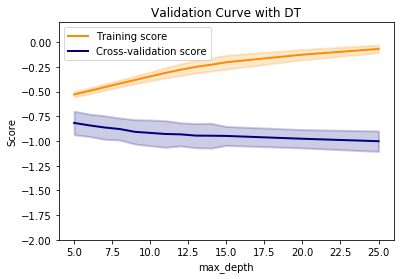

In [49]:
from sklearn.model_selection import validation_curve
param_range = [5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 20, 25]
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(random_state=42), X, y, param_name="max_depth", param_range=param_range,
    scoring="neg_root_mean_squared_error", n_jobs=8)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DT")
plt.xlabel(r"max_depth")
plt.ylabel("Score")
plt.ylim(-2, 0.2)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(Xtrain, ytrain)
ytrain_predict = dt.predict(Xtrain)
ypredict = dt.predict(Xtest)
#ypredict[ypredict<0] = 0.0
#ypredict[ypredict>3] = 3.0
print('TRAIN : mean_squared_error without rounding the prediction', mean_squared_error(ytrain_predict, ytrain, squared=False))
print('TEST : mean_squared_error', mean_squared_error(ypredict, ytest, squared=False))

TRAIN : mean_squared_error without rounding the prediction 0.5736403495226607
TEST : mean_squared_error 0.8516551272059615


In [16]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(Xtrain, ytrain)

ytrain_predict = rf.predict(Xtrain)
ytrain_predict[ytrain_predict<0] = 0.0
ytrain_predict[ytrain_predict>3] = 3.0

ypredict = rf.predict(Xtest)
ypredict[ypredict<0] = 0.0
ypredict[ypredict>3] = 3.0

print('TRAIN : mean_squared_error without rounding the prediction', mean_squared_error(ytrain_predict, ytrain, squared=False))
print('TEST : mean_squared_error without rounding the prediction', mean_squared_error(ypredict, ytest, squared=False))
print('TEST : mean_squared_error with rounding the prediction', mean_squared_error(np.round(ypredict,0), ytest, squared=False))

TRAIN : mean_squared_error without rounding the prediction 0.3731089625701459
TEST : mean_squared_error without rounding the prediction 0.7532227856578574
TEST : mean_squared_error with rounding the prediction 0.8026853664222081


In [17]:
print(X.columns[np.argsort(rf.feature_importances_)[:-20:-1]])

MultiIndex([(             'Loudness_sma3',         'min'),
            (           'slope0-500_sma3',      'median'),
            (                'mfcc3_sma3',        'mean'),
            (                'mfcc4_sma3',      'median'),
            (                'mfcc4_sma3', 'percentil75'),
            (             'mfcc2_sma3_de', 'percentil75'),
            (           'slope0-500_sma3', 'percentil25'),
            (         'spectralFlux_sma3',         'min'),
            ('F3amplitudeLogRelF0_sma3nz', 'percentil75'),
            (           'slope0-500_sma3',        'mean'),
            (                'mfcc3_sma3', 'percentil25'),
            (                'mfcc3_sma3',      'median'),
            (             'mfcc3_sma3_de',         'std'),
            (          'mfcc3_sma3_de_de',         'std'),
            (                'mfcc2_sma3',      'median'),
            (      'hammarbergIndex_sma3',         'std'),
            (                'mfcc3_sma3',         'min'

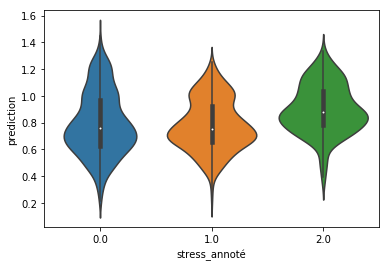

In [18]:
import seaborn as sns
df_compare = pd.DataFrame(np.stack([ypredict, ytest],axis=1),columns=['prediction','stress_annoté'])
df_compare
sns.violinplot(x="stress_annoté", y="prediction", data=df_compare)

In [19]:
ytest_and_predict = pd.concat([ytest.reset_index(),pd.DataFrame(ypredict,columns=['predicted_stress'])],axis=1)
ytest_and_predict

,video_name,diapo,frameTimeWindow,stress,predicted_stress
0,WIN_20210408_14_11_32_Pro,1,0,0.0,1.270474
1,WIN_20210408_14_11_32_Pro,1,5,0.0,1.197657
2,WIN_20210408_14_11_32_Pro,1,10,0.0,1.146630
3,WIN_20210408_14_11_32_Pro,1,15,0.0,1.031224
4,WIN_20210408_14_11_32_Pro,1,20,0.0,1.054801
...,...,...,...,...,...
1575,WIN_20210417_14_53_12_Pro,18,600,1.0,0.790593
1576,WIN_20210417_14_53_12_Pro,18,605,1.0,0.918609
1577,WIN_20210417_14_53_12_Pro,18,610,1.0,0.807967
1578,WIN_20210417_14_53_12_Pro,18,615,1.0,0.630966


/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


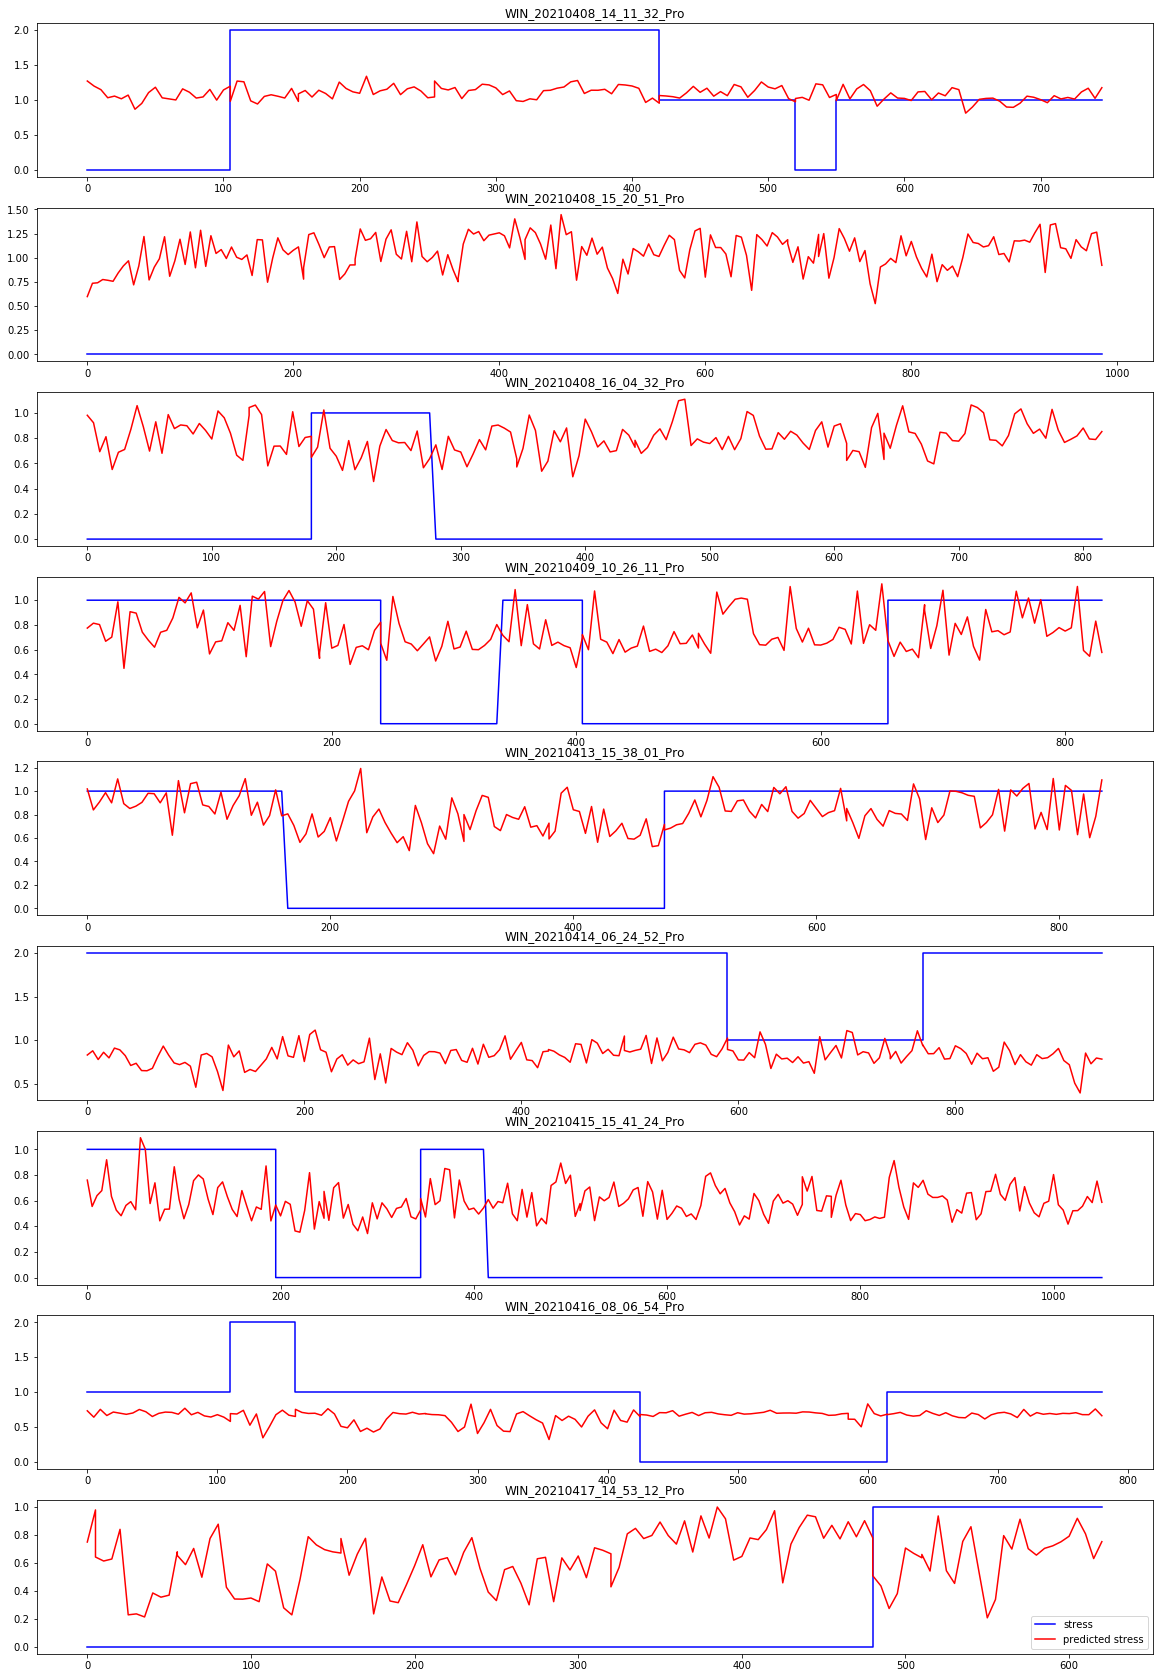

In [20]:

plt.figure(figsize=(20,30))
i = 1
for video_name in ytest_and_predict.video_name.unique():
    plt.subplot(9,1,i)
    plt.title(video_name)
    ind = ytest_and_predict.loc[:,'video_name'] == video_name
    plt.plot(ytest_and_predict.loc[ind,'frameTimeWindow'], ytest_and_predict.loc[ind,'stress'], 
            color='b', label='stress')
    plt.plot(ytest_and_predict.loc[ind,'frameTimeWindow'], ytest_and_predict.loc[ind,'predicted_stress'], 
            color='r', label='predicted stress')
    i += 1
plt.legend();

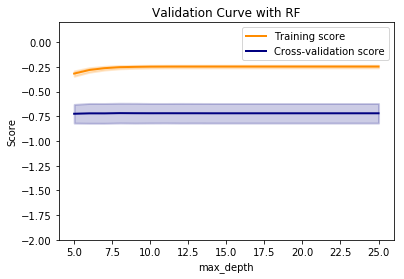

In [58]:
from sklearn.model_selection import validation_curve
param_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]
train_scores, test_scores = validation_curve(
    RandomForestRegressor(n_estimators=100, random_state=42), X, y, param_name="max_depth", param_range=param_range,
    scoring="neg_root_mean_squared_error", n_jobs=8)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"max_depth")
plt.ylabel("Score")
plt.ylim(-2, 0.2)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [59]:
from xgboost import XGBClassifier
rf = XGBClassifier(n_estimators=100, max_depth=20, use_label_encoder=False,  objective='multi:softmax', num_class=4,)
rf.fit(Xtrain, ytrain, eval_metric='rmse')
ypredict = rf.predict(Xtest)
print('mean_squared_error', mean_squared_error(ypredict, ytest, squared=False))

mean_squared_error 0.7168604389202189


In [60]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=100, max_depth=20)
rf.fit(Xtrain, ytrain, eval_metric='rmse')
ypredict = rf.predict(Xtest)
ypredict[ypredict<0] = 0.0
ypredict[ypredict>3] = 3.0
print('mean_squared_error', mean_squared_error(ypredict, ytest, squared=False))

mean_squared_error 0.7055996763944692


In [61]:
print('mean_squared_error', mean_squared_error(np.round(ypredict,0), ytest, squared=False))

mean_squared_error 0.8333333333333334


In [62]:
ytest.values

array([0., 0., 0., 1., 0., 2., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 2., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1., 2., 1., 0., 0.,
       1., 0., 0., 1.])

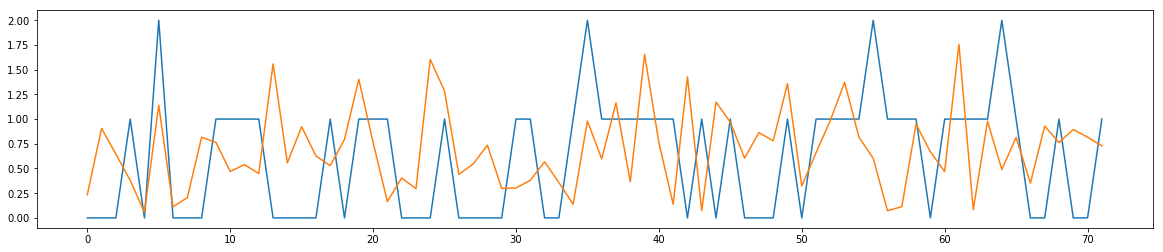

In [63]:
plt.figure(figsize=(20,4))
plt.plot(ytest.values, label='test')
plt.plot(ypredict, label='test predict')

In [64]:
np.mean(ytest == ypredict)

0.0

(array([ 4., 11., 19.,  9., 16., 11.,  2.]),
 array([-1.60399842, -1.15914735, -0.71429628, -0.26944521,  0.17540586,
         0.62025693,  1.065108  ,  1.50995907]),
 <a list of 7 Patch objects>)

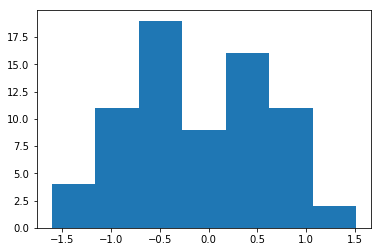

In [65]:
plt.hist(ytest.values - ypredict, bins = 7, label='test predict')

In [66]:
from sklearn.metrics import plot_confusion_matrix
class_names = [0,1,2,3]
disp = plot_confusion_matrix(dt, Xtest, ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None #'true','pred', 'all'                                 )


SyntaxError: unexpected EOF while parsing (<ipython-input-66-c8a46e2518de>, line 6)

## Classifiers

In [42]:
ypredict_list, ytest_list = [], []

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=42)
    rf.fit(Xtrain, ytrain)
    ypredict = rf.predict(Xtest)

    ypredict_list = np.concatenate([ypredict_list,ypredict])
    ytest_list = np.concatenate([ytest_list,ytest])

/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(ytest_list, ypredict_list))
print(accuracy_score(ytest_list,ypredict_list))
print(f1_score(ytest_list, ypredict_list,labels=[0,1,2,3],average='weighted'))


[[ 976  310    7    0]
 [  40 2859   28    0]
 [  86  111  783    0]
 [   0    1    1    0]]
0.8877354863514033
0.8848289318639385


In [44]:
import ordinal_classification as o_c
#For ordinal classif
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth=7, n_estimators=100, random_state = 42)
model2 = RandomForestClassifier(max_depth=7, n_estimators=100, random_state = 42)
model3 = RandomForestClassifier(max_depth=7, n_estimators=100, random_state = 42)
list_models = [model1, model2, model3]

ypredict_list, ytest_list = [], []


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    ypredict = o_c.ordinal_classification(list_models, Xtrain, ytrain, Xtest)

    ypredict_list = np.concatenate([ypredict_list,ypredict])
    ytest_list = np.concatenate([ytest_list,ytest])


/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(ytest_list, ypredict_list))
print(accuracy_score(ytest_list,ypredict_list))
print(f1_score(ytest_list, ypredict_list,labels=[0,1,2,3],average='weighted'))

[[ 973  311    9    0]
 [  50 2854   23    0]
 [  63  114  803    0]
 [   1    0    1    0]]
0.8900422914263745
0.8873538566974932


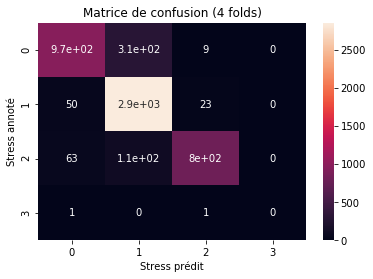

In [46]:
import seaborn as sns 
sns.heatmap(confusion_matrix(ytest_list,ypredict_list),annot=True)
plt.title('Matrice de confusion ('+str(4)+' folds)')
plt.ylabel('Stress annoté')
plt.xlabel('Stress prédit');

In [87]:
## Données audio seulement

In [88]:
ypredict_list, ytest_list = [], []

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf.get_n_splits(X_audio, y_audio)

for train_index, test_index in skf.split(X_audio, y_audio):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=42)
    rf.fit(Xtrain, ytrain)
    ypredict = rf.predict(Xtest)

    ypredict_list = np.concatenate([ypredict_list,ypredict])
    ytest_list = np.concatenate([ytest_list,ytest])

/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [89]:
y_audio.value_counts()

0.0    68
1.0    66
2.0    15
3.0     1
Name: stress, dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(ytest_list,ypredict_list))
print(accuracy_score(ytest_list,ypredict_list))
print(f1_score(ytest_list,ypredict_list,labels=[0,1,2,3],average='weighted'))

[[17 33  0  0]
 [19 67  0  0]
 [ 1 12  0  0]
 [ 0  1  0  0]]
0.56
0.5163318508250063


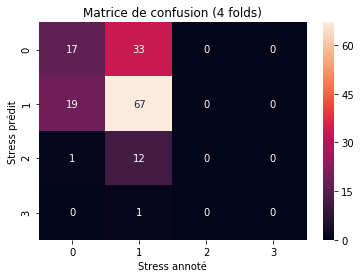

In [91]:
import seaborn as sns 
sns.heatmap(confusion_matrix(ytest_list,ypredict_list),annot=True)
plt.title('Matrice de confusion ('+str(4)+' folds)')
plt.ylabel('Stress prédit')
plt.xlabel('Stress annoté');

In [47]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
rf.fit(Xtrain, ytrain)

ytrain_predict = rf.predict(Xtrain)
ytrain_predict[ytrain_predict<0] = 0.0
ytrain_predict[ytrain_predict>3] = 3.0

ypredict = rf.predict(Xtest)
ypredict[ypredict<0] = 0.0
ypredict[ypredict>3] = 3.0

In [48]:
ypredict_list, ytest_list = [], []

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
    rf.fit(Xtrain, ytrain)
    ypredict = rf.predict(Xtest)

    ypredict_list = np.concatenate([ypredict_list,ypredict])
    ytest_list = np.concatenate([ytest_list,ytest])

/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [49]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(ytest_list,ypredict_list, squared=False))
print(r2_score(ytest_list,ypredict_list))

0.33685603875045067
0.7391189468048711


In [95]:
ypredict_list, ytest_list = [], []

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
skf.get_n_splits(X_audio, y_audio)

for train_index, test_index in skf.split(X_audio, y_audio):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
    rf.fit(Xtrain, ytrain)
    ypredict = rf.predict(Xtest)

    ypredict_list = np.concatenate([ypredict_list,ypredict])
    ytest_list = np.concatenate([ytest_list,ytest])

from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(ytest_list,ypredict_list, squared=False))
print(r2_score(ytest_list,ypredict_list))

/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
0.6159616745122937
0.03266882146971717


### New classifiers

#### All diapos

In [22]:
Xtrain = X.loc[train_video_list,:,:]
Xtest = X.loc[test_video_list,:,:]
ytrain = y.loc[train_video_list,:,:]
ytest = y.loc[test_video_list,:,:]

In [23]:
resultats = []

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

#print("TRAIN:", train_index, "TEST:", test_index)
for n_estimators in [100, 150, 200]:
    for max_depth in [5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 20, 25]:
    
        rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42, n_jobs=-1)
        rf.fit(Xtrain, ytrain)
        ytrain_predict = rf.predict(Xtrain)
        ytest_predict = rf.predict(Xtest)

        resultats.append([n_estimators,max_depth,
                            accuracy_score(ytrain,ytrain_predict),accuracy_score(ytest,ytest_predict),
                            f1_score(ytrain,ytrain_predict,labels=[0,1,2,3],average='weighted'), 
                            f1_score(ytest,ytest_predict,labels=[0,1,2,3],average='weighted')])



/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/home/neo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor 

/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]

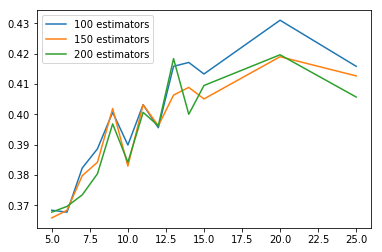

In [25]:
df_resultats = pd.DataFrame(resultats, columns=['n_estimators', 'max_depth', 'train_acc', 'test_acc', 'train_f1', 'test_f1'])
plt.plot(df_resultats.loc[df_resultats.iloc[:,0] == 100].iloc[:,1], df_resultats.loc[df_resultats.iloc[:,0] == 100].iloc[:,3], label='100 estimators')
plt.plot(df_resultats.loc[df_resultats.iloc[:,0] == 150].iloc[:,1], df_resultats.loc[df_resultats.iloc[:,0] == 150].iloc[:,3], label='150 estimators')
plt.plot(df_resultats.loc[df_resultats.iloc[:,0] == 200].iloc[:,1], df_resultats.loc[df_resultats.iloc[:,0] == 200].iloc[:,3], label='200 estimators')
plt.legend();

In [26]:
df_resultats[df_resultats.test_acc == df_resultats.test_acc.max()]

,n_estimators,max_depth,train_acc,test_acc,train_f1,test_f1
11,100,20,1.0,0.431013,1.0,0.372467


In [27]:
max_depth = 20
n_estimators = 100
rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
rf.fit(Xtrain, ytrain)
ytrain_predict = rf.predict(Xtrain)
ytest_predict = rf.predict(Xtest)

In [31]:
ytest.shape, ytest_predict.shape

((1580,), (1580,))

In [28]:
ytest_and_predict = pd.concat([ytest.reset_index(),pd.DataFrame(ytest_predict,columns=['predicted_stress'])],axis=1).sort_values(['video_name','diapo'])

,video_name,diapo,frameTimeWindow,stress,predicted_stress
0,WIN_20210408_14_11_32_Pro,1,0,0.0,1.0
1,WIN_20210408_14_11_32_Pro,1,5,0.0,1.0
2,WIN_20210408_14_11_32_Pro,1,10,0.0,1.0
3,WIN_20210408_14_11_32_Pro,1,15,0.0,1.0
4,WIN_20210408_14_11_32_Pro,1,20,0.0,1.0
...,...,...,...,...,...
1575,WIN_20210417_14_53_12_Pro,18,600,1.0,1.0
1576,WIN_20210417_14_53_12_Pro,18,605,1.0,1.0
1577,WIN_20210417_14_53_12_Pro,18,610,1.0,1.0
1578,WIN_20210417_14_53_12_Pro,18,615,1.0,1.0


/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/neo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


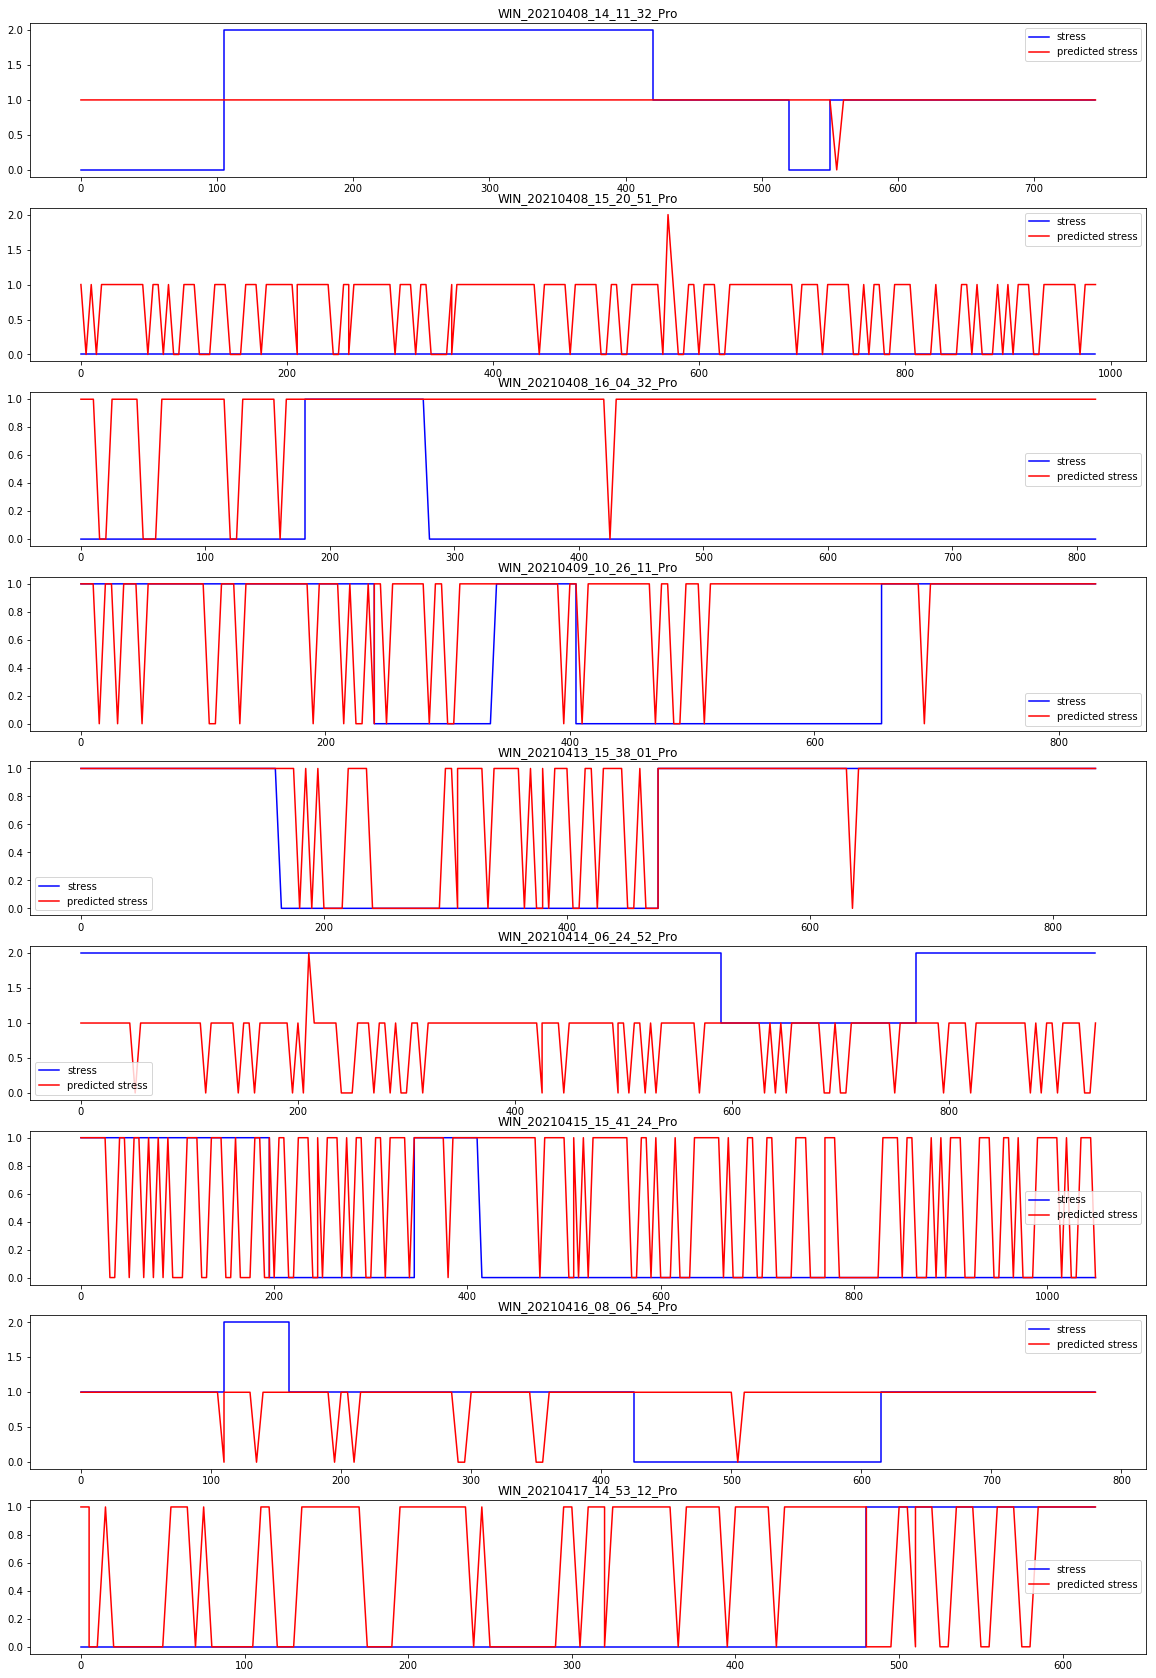

In [32]:

plt.figure(figsize=(20,30))
i = 1
for video_name in ytest_and_predict.video_name.unique():
    plt.subplot(9,1,i)
    plt.title(video_name)
    ind = ytest_and_predict.loc[:,'video_name'] == video_name
    plt.plot(ytest_and_predict.loc[ind,'frameTimeWindow'], ytest_and_predict.loc[ind,'stress'], 
            color='b', label='stress')
    plt.plot(ytest_and_predict.loc[ind,'frameTimeWindow'], ytest_and_predict.loc[ind,'predicted_stress'], 
            color='r', label='predicted stress')
    plt.legend();
    i += 1


#### Leave one interview out

In [38]:
video_name_list = X.reset_index().video_name.unique()
X = X.reset_index()
y = y.reset_index()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

max_depth = 10
n_estimators = 100
split = 0

In [42]:
resultats = []
split = 0

for n_estimators in [100, 150, 200]:
    for max_depth in [5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 20, 25]:

        split = 0
        for video_name in video_name_list:
            Xtrain = X[X.video_name != video_name].set_index(['video_name','diapo','frameTimeWindow'])
            ytrain = y[X.video_name != video_name].set_index(['video_name','diapo','frameTimeWindow'])
            Xtest = X[X.video_name == video_name].set_index(['video_name','diapo','frameTimeWindow'])
            ytest = y[X.video_name == video_name].set_index(['video_name','diapo','frameTimeWindow'])

            rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42, n_jobs=-1)
            rf.fit(Xtrain, ytrain.values.ravel())
            ytrain_predict = rf.predict(Xtrain)
            ytest_predict = rf.predict(Xtest)

            resultats.append([n_estimators,max_depth,split,
                                accuracy_score(ytrain,ytrain_predict),accuracy_score(ytest,ytest_predict)])
                                #f1_score(ytrain,ytrain_predict,labels=[0,1,2,3],average='weighted'), 
                                #f1_score(ytest,ytest_predict,labels=[0,1,2,3],average='weighted')])
            split += 1


df_resultats = pd.DataFrame(resultats, columns=['n_estimators', 'max_depth', 'split','train_acc', 'test_acc'])
df_resultats_agg = df_resultats.groupby(['n_estimators', 'max_depth']).agg({'train_acc':['mean','std'], 
                                                                            'test_acc':['mean','std']})
df_resultats_agg


KeyboardInterrupt: 